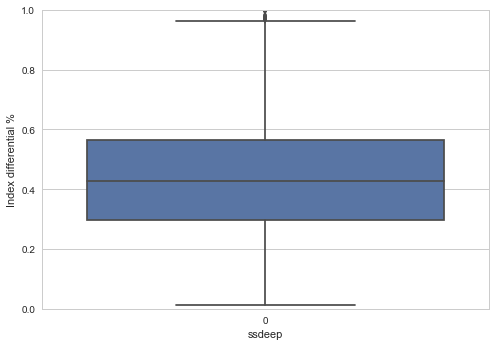

In [48]:
import subprocess
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

%matplotlib inline

binary_compare_df = pd.read_csv("GNUAnalysis.txt", header = None)
ssdeep_df = pd.read_csv("ssdeep_all.csv", header = None)

binary_compare_df.columns = ['Binary #1', 'Binary #2', 'Similarity Index']
ssdeep_df.columns = ['Binary #1', 'Binary #2', 'Similarity Index']

binary_compare_dict = {}
ssdeep_compare_dict = {}
for i, row in binary_compare_df.iterrows():
    firstStrippedPath = row["Binary #1"].rsplit("/", 1)[1]
    secondStrippedPath = row["Binary #2"].rsplit("/", 1)[1]
    binary_compare_df.set_value(i, "Binary #1", firstStrippedPath)
    binary_compare_df.set_value(i, "Binary #2", secondStrippedPath)
    binary_compare_key = frozenset((firstStrippedPath, secondStrippedPath))
    binary_compare_dict[binary_compare_key] = row['Similarity Index']
    
for i, row in ssdeep_df.iterrows():
    firstStrippedPath = row["Binary #1"].rsplit("/", 1)[1]
    secondStrippedPath = row["Binary #2"].rsplit("/", 1)[1]
    ssdeep_df.set_value(i, "Binary #1", firstStrippedPath)
    ssdeep_df.set_value(i, "Binary #2", secondStrippedPath)
    ssdeep_compare_key = frozenset((firstStrippedPath, secondStrippedPath))
    ssdeep_compare_dict[ssdeep_compare_key] = row['Similarity Index']
    
keys_binary_compare = set(binary_compare_dict.keys())
keys_ssdeep_compare = set(ssdeep_compare_dict.keys())

intersection = keys_binary_compare & keys_ssdeep_compare
intersection_dict = {}
intersection_value_list = []

for i in intersection:
    intersection_dict[i] = binary_compare_dict[i] - ssdeep_compare_dict[i]
    intersection_value_list.append(binary_compare_dict[i] - ssdeep_compare_dict[i])
    
# for key, value in intersection_dict.items():
#     print(key, value)



sns.set(style="whitegrid", color_codes=True)
ax = sns.boxplot(data = intersection_value_list)
ax.set(xlabel = "ssdeep", ylabel = "Index differential %")
plt.ylim(0, 1)
plt.show()



